# Real vs fake news prediction model

## Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, accuracy_score
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm, tree
from sklearn.linear_model import SGDClassifier, LogisticRegression

## Read in datasets

In [2]:
real_df = pd.read_csv('~/documents/Data/Fake vs Real News/real_eng.csv', index_col = 0)
fake_df = pd.read_csv('~/documents/Data/Fake vs Real News/fake_eng.csv', index_col = 0)

## Transform data to correct format for sklearn modelling

#### Add a column to specify whether an article is real or fake

In [3]:
real_df['real_or_fake'] = 'real'
fake_df['real_or_fake'] = 'fake'

#### Concatenate the two articles into a single dataframe

In [4]:
news_df = pd.concat([real_df, fake_df])

#### Shuffle the rows of the dataframe

In [5]:
news_df = news_df.sample(frac=1)

In [6]:
news_df.sample(frac=1).head()

,title,text,length_title,proportion_capitals_title,real_or_fake
16367,"Venezuelan anti-Maduro governor sacked, opposi...","MARACAIBO/CARACAS, Venezuela (Reuters) - The n...",59,0.033898,real
17265,New Jakarta governor faces backlash for racial...,JAKARTA (Reuters) - The new governor of Indone...,62,0.032258,real
4246,New York police arrest 25 at immigration prote...,NEW YORK (Reuters) - New York police on Thursd...,63,0.063492,real
5203,Tea Party Candidate Wants To Be Elected So Ba...,"Art Halvorson, a Tea Partier with a major agen...",97,0.185567,fake
8233,"Obama says Trump unfit for presidency, has 'ou...",VIENTIANE (Reuters) - U.S. President Barack Ob...,65,0.030769,real


#### Feature and target columns

In [7]:
X = news_df[['length_title', 'proportion_capitals_title']]
y = news_df['real_or_fake']

#### Standardise the feature columns

In [8]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

#### Split the data into a training set and a testing set

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

## Logistic Regression Classifier

#### Fit the model to the dataset

In [10]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

#### Model accuracy

In [11]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9874712349782664


#### Confusion matrix

In [12]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1796   33]
 [  16 2066]]


## K-Nearest Neighbours Classifier

#### Set up the hyperparameter space for tuning

In [13]:
k_space = np.arange(2, 20, 2)

#### Initialise the cross-validation scores array

In [14]:
cv_scores = []

#### Fit the model to the dataset

In [15]:
tic = time.perf_counter()
for k in k_space:
    knn = KNeighborsClassifier(n_neighbors = k)
    cv_score = np.mean(cross_val_score(knn, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

10.0 seconds


#### Model accuracy

    k  Cross-validation scores
0   2                 0.981417
1   4                 0.983804
2   6                 0.984230
3   8                 0.984656
4  10                 0.984571
5  12                 0.985025
6  14                 0.985196
7  16                 0.985423
8  18                 0.985253


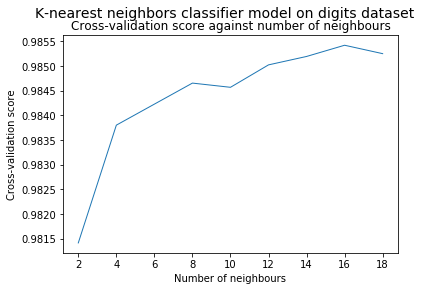

In [16]:
print(pd.DataFrame({'k': k_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(k_space, cv_scores, linewidth = 1)
plt.suptitle('K-nearest neighbors classifier model on digits dataset', size = 14)
plt.title('Cross-validation score against number of neighbours')
plt.xlabel('Number of neighbours')
plt.ylabel('Cross-validation score')
plt.xticks(k_space)
plt.show()

#### Best model

In [44]:
knn = KNeighborsClassifier(n_neighbors = 16)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

#### Best model score

In [45]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9861927895678855


#### Best model confusion matrix

In [46]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1805   24]
 [  30 2052]]


## Support vector machine classifier

#### Set up the hyperparameter space for tuning

In [51]:
C_space = np.arange(0.01, 0.05, 0.005)

#### Initialise the cross-validation scores array

In [52]:
cv_scores = []

#### Fit the model to the dataset

In [53]:
tic = time.perf_counter()
for C in C_space:
    svc = svm.LinearSVC(C = C, max_iter = 2000)
    cv_score = np.mean(cross_val_score(svc, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

2.0 seconds


#### Model accuracy

       C  Cross-validation scores
0  0.010                 0.985224
1  0.015                 0.985338
2  0.020                 0.985395
3  0.025                 0.985452
4  0.030                 0.985480
5  0.035                 0.985480
6  0.040                 0.985480
7  0.045                 0.985452


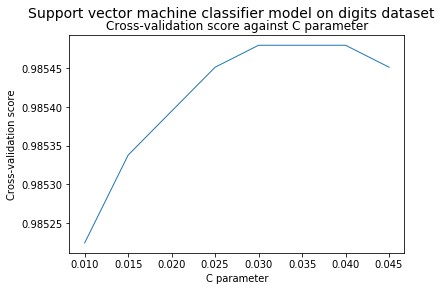

In [54]:
print(pd.DataFrame({'C': C_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(C_space, cv_scores, linewidth = 1)
plt.suptitle('Support vector machine classifier model on digits dataset', size = 14)
plt.title('Cross-validation score against C parameter')
plt.xlabel('C parameter')
plt.ylabel('Cross-validation score')
plt.show()

#### Best model

In [55]:
svc = svm.LinearSVC(C = 0.035, max_iter = 2000)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

#### Best model score

In [56]:
score = accuracy_score(y_test, y_pred)
print(score)

0.986959856814114


#### Best model confusion matrix

In [57]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1794   35]
 [  16 2066]]


# Stochastic gradient descent classifier

#### Set up the hyperparameter space for tuning

In [58]:
alpha_space = np.arange(5e-6, 2e-5, 1e-6)

#### Initialise the cross-validation scores array

In [59]:
cv_scores = []

#### Fit the model to the dataset

In [60]:
tic = time.perf_counter()
for a in alpha_space:
    sgdc = SGDClassifier(alpha = a)
    cv_score = np.mean(cross_val_score(sgdc, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

4.0 seconds


#### Model accuracy

       alpha  Cross-validation scores
0   0.000005                 0.985452
1   0.000006                 0.984230
2   0.000007                 0.984003
3   0.000008                 0.985253
4   0.000009                 0.984826
5   0.000010                 0.984656
6   0.000011                 0.984684
7   0.000012                 0.984002
8   0.000013                 0.984827
9   0.000014                 0.984457
10  0.000015                 0.984571
11  0.000016                 0.984059
12  0.000017                 0.984514
13  0.000018                 0.984315
14  0.000019                 0.985679
15  0.000020                 0.984741


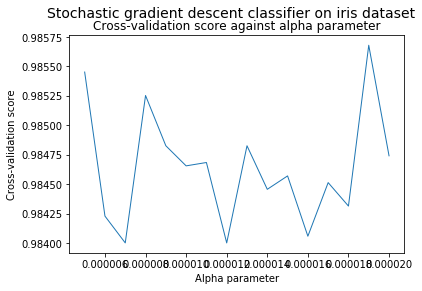

In [61]:
print(pd.DataFrame({'alpha': alpha_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(alpha_space, cv_scores, linewidth = 1)
plt.suptitle('Stochastic gradient descent classifier on iris dataset', size = 14)
plt.title('Cross-validation score against alpha parameter')
plt.xlabel('Alpha parameter')
plt.ylabel('Cross-validation score')
plt.show()

#### Best model

In [31]:
sgdc = SGDClassifier(alpha = 1.1e-5)
sgdc.fit(X_train, y_train)
y_pred = sgdc.predict(X_test)

#### Best model score

In [32]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9856814114037331


#### Best model confusion matrix

In [33]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1785   44]
 [  12 2070]]


## Decision tree classifier

#### Set up the parameter space

In [34]:
max_depth_space = np.arange(1, 12, 1)

#### Initialise the cross-validation scores array

In [35]:
cv_scores = []

#### Fit the model to the dataset

In [36]:
tic = time.perf_counter()
for d in max_depth_space:
    dec_tree = tree.DecisionTreeClassifier(max_depth = d)
    cv_score = np.mean(cross_val_score(dec_tree, X_train, y_train, cv = 5))
    cv_scores.append(cv_score)
toc = time.perf_counter()
print(round(toc - tic, 0), 'seconds')

3.0 seconds


#### Model accuracy

    max_depth  Cross-validation scores
0           1                 0.982411
1           2                 0.982411
2           3                 0.984855
3           4                 0.984770
4           5                 0.985167
5           6                 0.985167
6           7                 0.984969
7           8                 0.984684
8           9                 0.984542
9          10                 0.984088
10         11                 0.984059


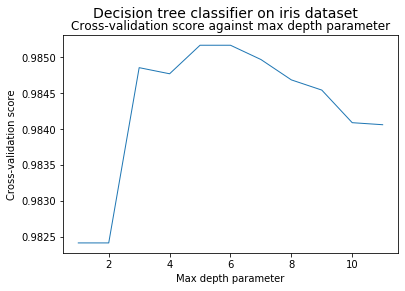

In [37]:
print(pd.DataFrame({'max_depth': max_depth_space,
                   'Cross-validation scores': cv_scores}))

plt.plot(max_depth_space, cv_scores, linewidth = 1)
plt.suptitle('Decision tree classifier on iris dataset', size = 14)
plt.title('Cross-validation score against max depth parameter')
plt.xlabel('Max depth parameter')
plt.ylabel('Cross-validation score')
plt.show()

#### Best model

In [41]:
dec_tree = tree.DecisionTreeClassifier(max_depth = 5)
dec_tree.fit(X_train, y_train)
y_pred = dec_tree.predict(X_test)

#### Best model score

In [42]:
score = accuracy_score(y_test, y_pred)
print(score)

0.9864484786499617


#### Best model confusion matrix

In [43]:
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[1801   28]
 [  25 2057]]
